# Load Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
boston_pop = pd.read_csv("../Datasets/boston_pop.csv")

In [3]:
boston_pop.head(n=25)

,Neighborhoods,pop 2013-2017,pop 2015-2019
0,Allston,19363,19261
1,Back Bay,18176,17783
2,Beacon Hill,9751,9648
3,Brighton,51785,55297
4,Charlestown,18901,19890
5,Dorchester,125947,126909
6,Downtown,17581,18306
7,East Boston,46655,47263
8,Fenway,32598,33489
9,Hyde Park,37094,38924


In [4]:
animal_cases = pd.read_csv("../Datasets/animal_cases.csv")

/tmp/ipykernel_77022/3211798956.py:1: DtypeWarning: Columns (13,16,18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  animal_cases = pd.read_csv("../Datasets/animal_cases.csv")


In [5]:
animal_cases.head()

,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,reason,...,ward,precinct,location_street_name,location_zipcode,latitude,longitude,geom_4326,source,year,animal
0,101000295622,2011-07-01 02:44:50,2011-07-04 02:44:49,2011-07-01 02:44:55,ONTIME,Closed,Case Closed Internal Case,Pick up Dead Animal,Public Works Department,Street Cleaning,...,Ward 16,1602,305 Freeport St,2122,42.302020,-71.051911,0101000020E6100000AC4EA98052C351C098735293A826...,Employee Generated,2011,Animal
1,101000295636,2011-07-01 03:44:54,2011-07-04 03:44:53,2011-07-01 05:19:44,ONTIME,Closed,Case Closed Case Resolved Pickup Dead Animal (...,Pick up Dead Animal,Public Works Department,Street Cleaning,...,Ward 18,1801,10 Ledgebrook Rd,2126,42.270690,-71.083371,0101000020E61000009AEA0EF255C551C0821CA0F4A522...,Constituent Call,2011,Cats
2,101000295715,2011-07-01 04:40:53,2011-07-04 04:40:53,2011-07-01 05:18:50,ONTIME,Closed,Case Closed Case Resolved,Pick up Dead Animal,Public Works Department,Street Cleaning,...,Ward 2,0202,114 Sixteenth St,2129,42.379345,-71.051074,0101000020E6100000EA197ECD44C351C06EBE625C8E30...,Constituent Call,2011,Animal
3,101000295859,2011-07-01 06:51:01,2011-07-04 06:51:00,2011-07-01 06:51:08,ONTIME,Closed,Case Closed Internal Case,Pick up Dead Animal,Public Works Department,Street Cleaning,...,Ward 15,1504,10 Hendry St,2125,42.308970,-71.064861,0101000020E61000004562F4AC26C451C0B1264B508C27...,Employee Generated,2011,Animal
4,101000295903,2011-07-01 07:46:49,2011-07-04 07:46:45,2011-07-01 09:15:33,ONTIME,Closed,Case Closed Case Resolved picked up,Pick up Dead Animal,Public Works Department,Street Cleaning,...,Ward 18,1813,69 Davison St,2136,42.257640,-71.117461,0101000020E6100000F91C537A84C751C0FE88B655FA20...,Employee Generated,2011,Animal


In [6]:
animal_cases.columns

Index(['case_enquiry_id', 'open_dt', 'sla_target_dt', 'closed_dt', 'on_time',
       'case_status', 'closure_reason', 'case_title', 'subject', 'reason',
       'type', 'queue', 'department', 'submitted_photo', 'closed_photo',
       'location', 'fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood', 'neighborhood_services_district',
       'ward', 'precinct', 'location_street_name', 'location_zipcode',
       'latitude', 'longitude', 'geom_4326', 'source', 'year', 'animal'],
      dtype='object')

In [7]:
case_by_neighborhood_per_year = animal_cases.groupby(['neighborhood', 'year']).size().reset_index(name='case_count')
case_by_neighborhood_per_year.head(n=20)

,neighborhood,year,case_count
0,,2011,7
1,,2012,15
2,,2013,11
3,,2014,11
4,,2015,2
5,,2016,3
6,,2017,14
7,,2018,18
8,,2019,15
9,,2020,23


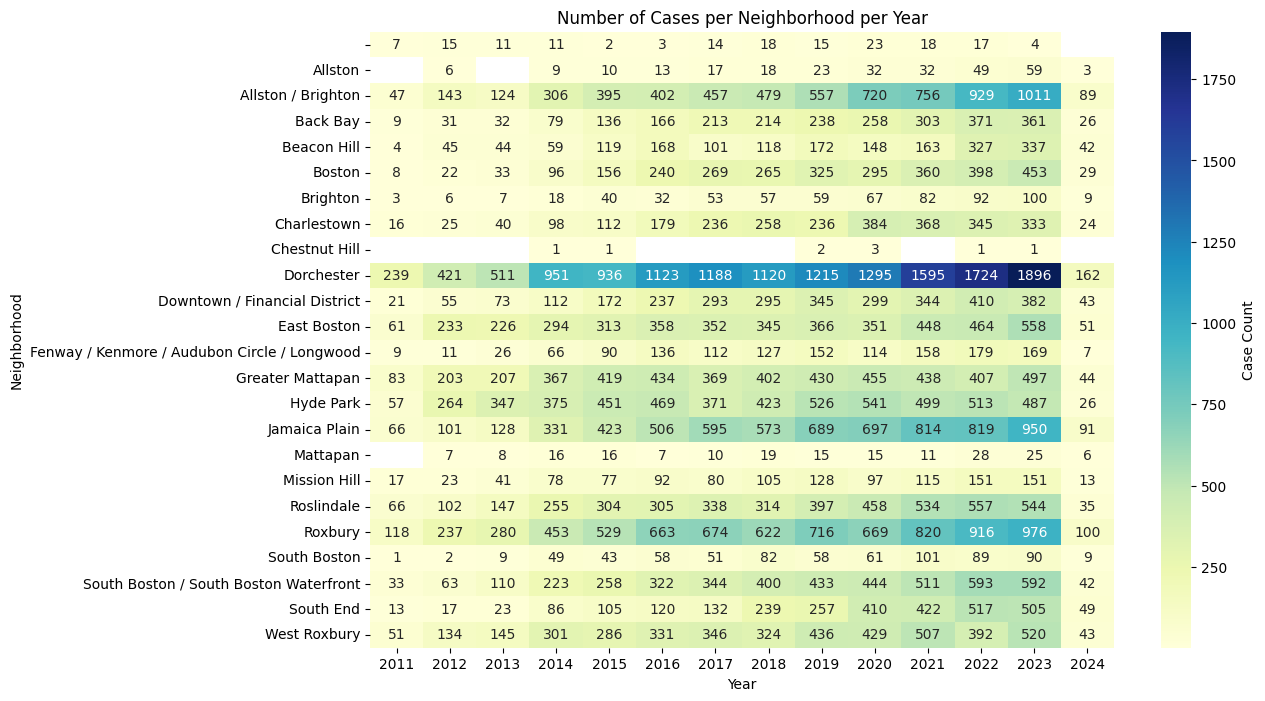

In [8]:
# Pivot the data
pivot_table = case_by_neighborhood_per_year.pivot(index='neighborhood', columns='year', values='case_count')

# Plotting using seaborn's heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt="g", cmap="YlGnBu", cbar_kws={'label': 'Case Count'})
plt.title('Number of Cases per Neighborhood per Year')
plt.ylabel('Neighborhood')
plt.xlabel('Year')

plt.show()

/tmp/ipykernel_77022/976730561.py:10: DtypeWarning: Columns (13,16,18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  animal_cases_df = pd.read_csv(animal_cases_path)
/tmp/ipykernel_77022/976730561.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  animal_cases_summary = animal_cases_summary.groupby(['neighborhood', 'census_period'])['animal'].sum().reset_index()
/tmp/ipykernel_77022/976730561.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(data_2013_2017['Neighborhoods'], rotation=90)
/tmp/ipykernel_77022/976730561.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1

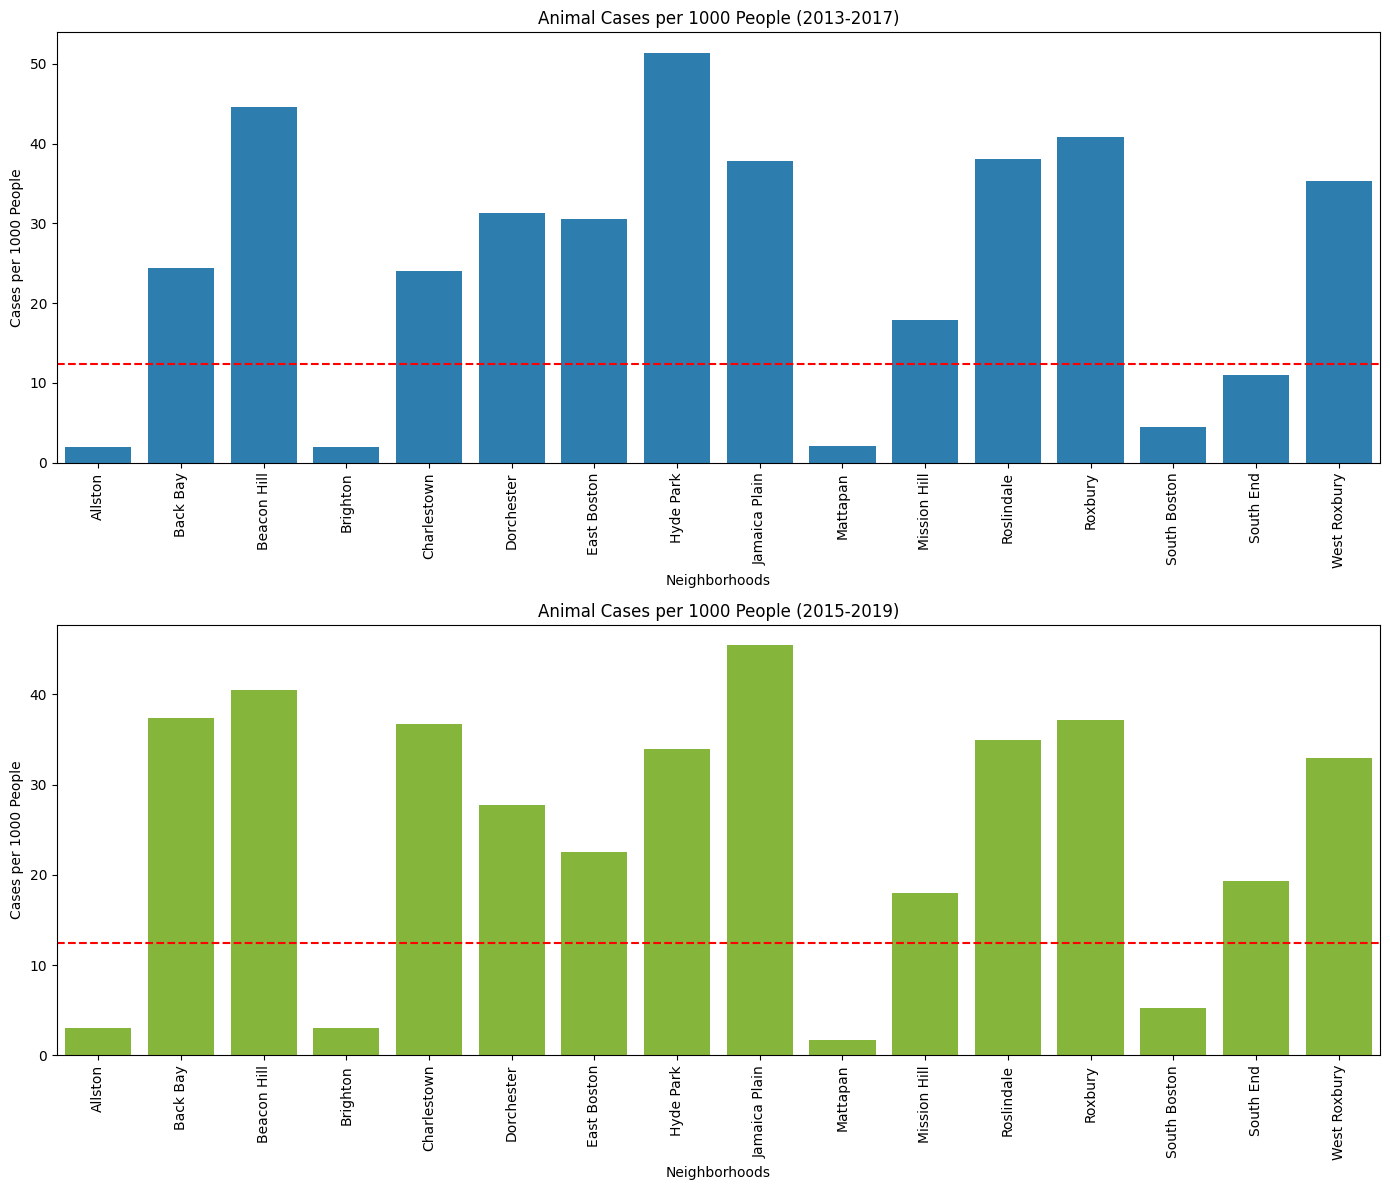

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
animal_cases_path = "../Datasets/animal_cases.csv"
boston_pop_path = "../Datasets/boston_pop.csv"

animal_cases_df = pd.read_csv(animal_cases_path)
boston_pop_df = pd.read_csv(boston_pop_path)

# Filter animal_cases_df to include only relevant data (assuming 'animal' column is correctly flagged)
animal_cases_df = animal_cases_df[animal_cases_df['animal'].notna()]

# Aggregate animal cases by neighborhood and year
animal_cases_summary = animal_cases_df.groupby(['neighborhood', 'year'])['animal'].count().reset_index()

# Map years to census periods
animal_cases_summary['census_period'] = pd.cut(animal_cases_summary['year'], 
                                               bins=[2012, 2017, 2020],  # Adjust bins as per actual year coverage
                                               labels=['2013-2017', '2015-2019'], 
                                               right=False)

# Aggregate cases by neighborhood and census period
animal_cases_summary = animal_cases_summary.groupby(['neighborhood', 'census_period'])['animal'].sum().reset_index()

# Merge with population data
merged_data = pd.merge(animal_cases_summary, boston_pop_df, how='inner', left_on='neighborhood', right_on='Neighborhoods')

# Calculate cases per 1000 people for each census period
merged_data['cases_per_1000_2013_2017'] = np.where(
    merged_data['census_period'] == '2013-2017',
    merged_data['animal'] / merged_data['pop 2013-2017'] * 1000,
    0
)
merged_data['cases_per_1000_2015_2019'] = np.where(
    merged_data['census_period'] == '2015-2019',
    merged_data['animal'] / merged_data['pop 2015-2019'] * 1000,
    0
)

# Calculate city-wide average cases per 1000 people for each period
average_cases_2013_2017 = merged_data['cases_per_1000_2013_2017'].mean()
average_cases_2015_2019 = merged_data['cases_per_1000_2015_2019'].mean()

# Filter data for each plot
data_2013_2017 = merged_data[merged_data['census_period'] == '2013-2017']
data_2015_2019 = merged_data[merged_data['census_period'] == '2015-2019']

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Plot for 2013-2017
sns.barplot(x='Neighborhoods', y='cases_per_1000_2013_2017', data=data_2013_2017, ax=ax[0], color='#1982c4')
ax[0].axhline(average_cases_2013_2017, color='red', linestyle='--')
ax[0].set_title('Animal Cases per 1000 People (2013-2017)')
ax[0].set_ylabel('Cases per 1000 People')
ax[0].set_xticklabels(data_2013_2017['Neighborhoods'], rotation=90)

# Plot for 2015-2019
sns.barplot(x='Neighborhoods', y='cases_per_1000_2015_2019', data=data_2015_2019, ax=ax[1], color='#8ac926')
ax[1].axhline(average_cases_2015_2019, color='red', linestyle='--')
ax[1].set_title('Animal Cases per 1000 People (2015-2019)')
ax[1].set_ylabel('Cases per 1000 People')
ax[1].set_xticklabels(data_2015_2019['Neighborhoods'], rotation=90)

plt.tight_layout()
plt.show()


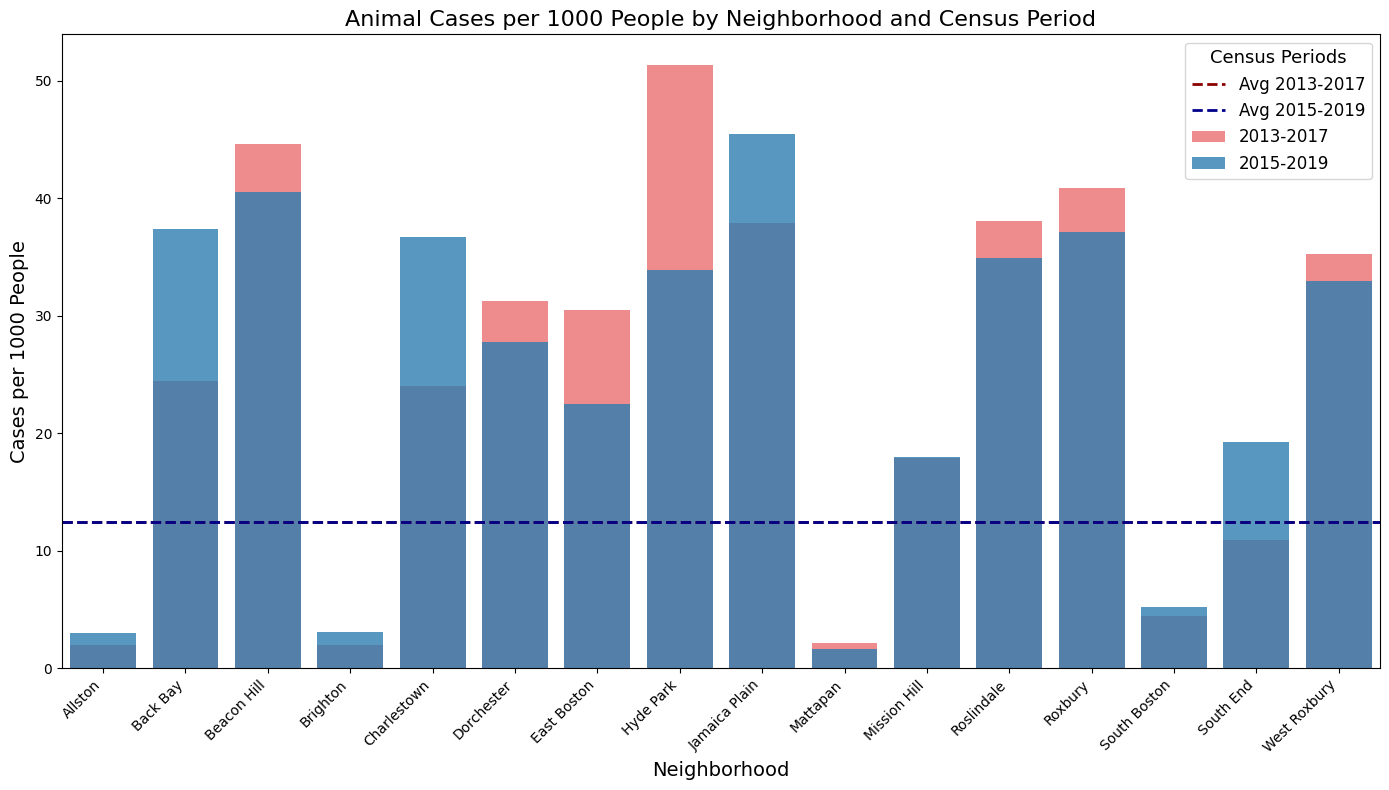

In [10]:
# Set the aesthetic style of the plots
# sns.set_style("whitegrid")
# sns.set_context("talk")

# Create figure and set size
plt.figure(figsize=(14, 8))

# Plot for 2013-2017 using data for 2013-2017
sns.barplot(x='Neighborhoods', y='cases_per_1000_2013_2017', data=data_2013_2017, 
            color="#ff595e", alpha=0.8, label='2013-2017')

# Plot for 2015-2019 using data for 2015-2019
sns.barplot(x='Neighborhoods', y='cases_per_1000_2015_2019', data=data_2015_2019, 
            color="#1982c4", alpha=0.8, label='2015-2019')

# Add city-wide average lines with improved legibility
plt.axhline(average_cases_2013_2017, color='darkred', linestyle='--', linewidth=2, label='Avg 2013-2017')
plt.axhline(average_cases_2015_2019, color='darkblue', linestyle='--', linewidth=2, label='Avg 2015-2019')

# Set titles and labels with enhanced font settings
plt.title('Animal Cases per 1000 People by Neighborhood and Census Period', fontsize=16)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Cases per 1000 People', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment for better readability

# Add a legend to differentiate the layers
plt.legend(title="Census Periods", title_fontsize='13', fontsize='12')

# Ensure layout is tight so labels don't get cut off
plt.tight_layout()

# Display the plot
plt.show()

/tmp/ipykernel_77022/4215193043.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(data_2013_2017['Neighborhoods'], rotation=90)
/tmp/ipykernel_77022/4215193043.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(data_2013_2017['Neighborhoods'], rotation=90)


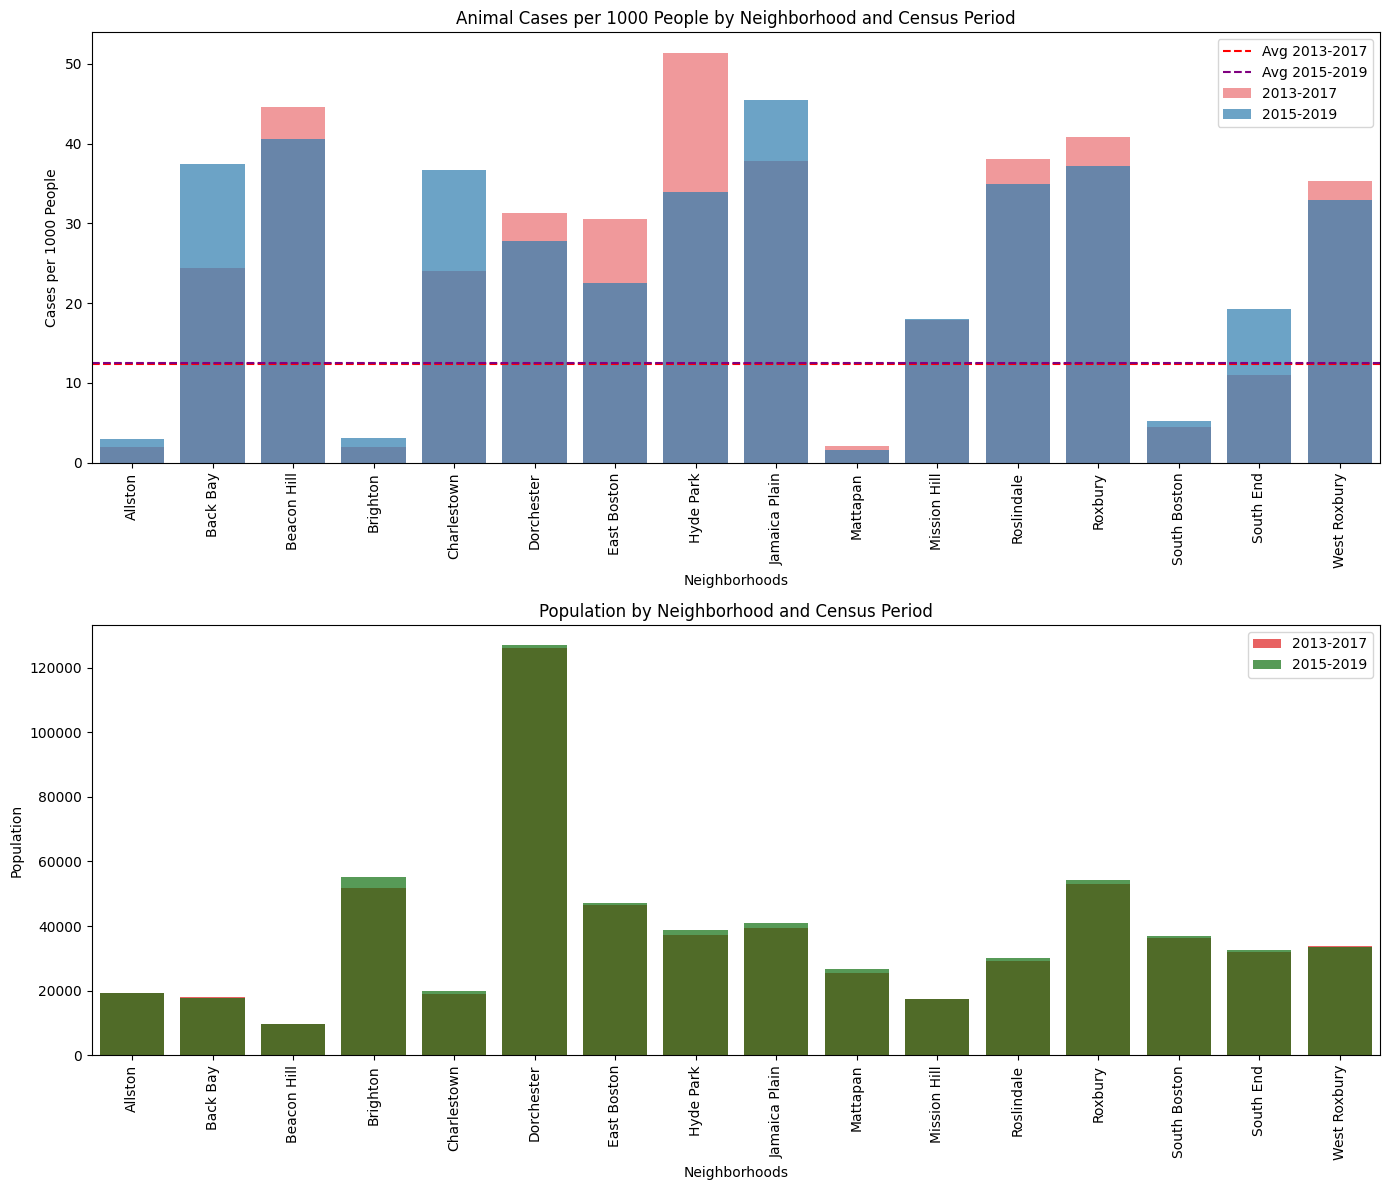

In [12]:
# Plotting
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Plot for animal cases per 1000 people
sns.barplot(x='Neighborhoods', y='cases_per_1000_2013_2017', data=data_2013_2017, ax=ax[0], color="#ff595e", alpha=0.7, label='2013-2017')
sns.barplot(x='Neighborhoods', y='cases_per_1000_2015_2019', data=data_2015_2019, ax=ax[0], color="#1982c4", alpha=0.7, label='2015-2019')
ax[0].axhline(average_cases_2013_2017, color='red', linestyle='--', label='Avg 2013-2017')
ax[0].axhline(average_cases_2015_2019, color='purple', linestyle='--', label='Avg 2015-2019')
ax[0].set_title('Animal Cases per 1000 People by Neighborhood and Census Period')
ax[0].set_ylabel('Cases per 1000 People')
ax[0].set_xticklabels(data_2013_2017['Neighborhoods'], rotation=90)
ax[0].legend()

# Plot for population by neighborhood
sns.barplot(x='Neighborhoods', y='pop 2013-2017', data=data_2013_2017, ax=ax[1], color='red', alpha=0.7, label='2013-2017')
sns.barplot(x='Neighborhoods', y='pop 2015-2019', data=data_2015_2019, ax=ax[1], color='green', alpha=0.7, label='2015-2019')
ax[1].set_title('Population by Neighborhood and Census Period')
ax[1].set_ylabel('Population')
ax[1].set_xticklabels(data_2013_2017['Neighborhoods'], rotation=90)
ax[1].legend()

plt.tight_layout()
plt.show()


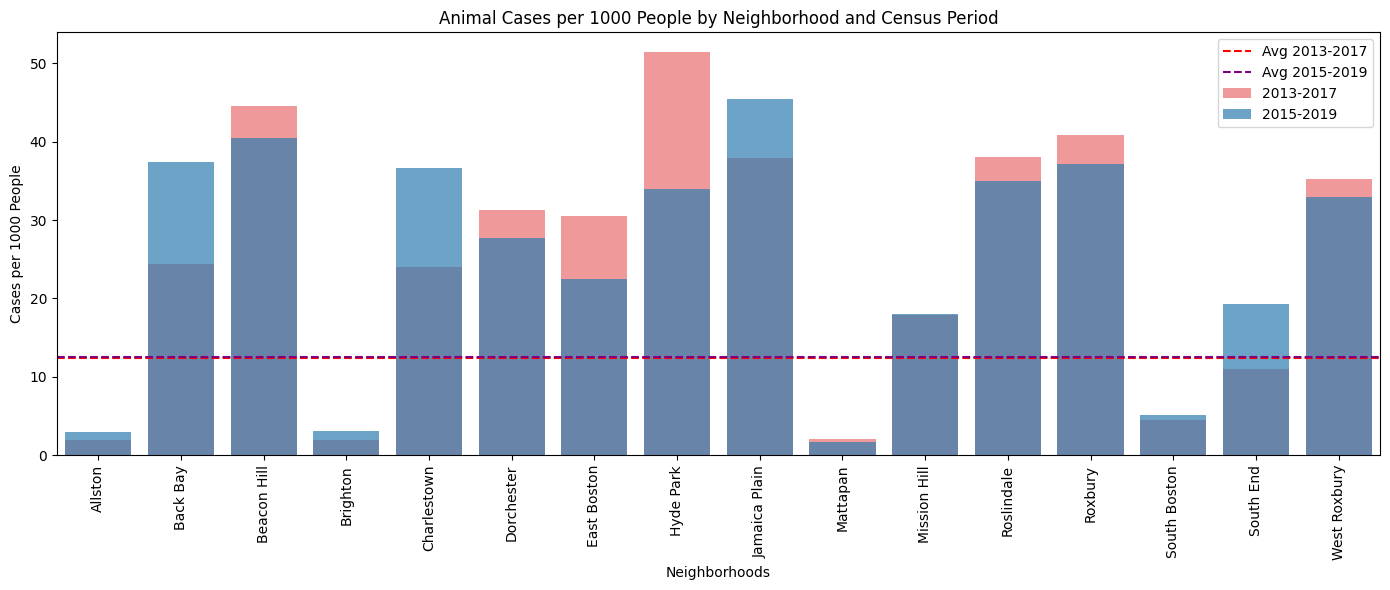

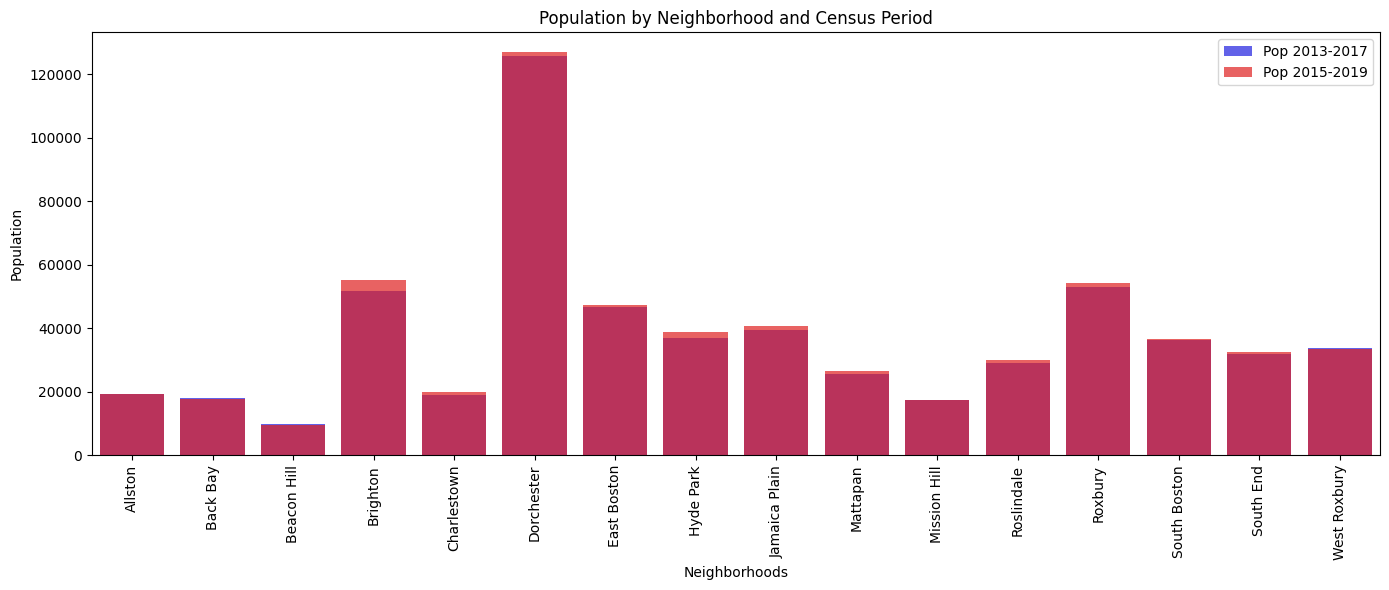

In [19]:
# First plot for animal cases per 1000 people
plt.figure(figsize=(14, 6))
sns.barplot(x='Neighborhoods', y='cases_per_1000_2013_2017', data=data_2013_2017, color="#ff595e", alpha=0.7, label='2013-2017')
sns.barplot(x='Neighborhoods', y='cases_per_1000_2015_2019', data=data_2015_2019, color="#1982c4", alpha=0.7, label='2015-2019')
plt.axhline(average_cases_2013_2017, color='red', linestyle='--', label='Avg 2013-2017')
plt.axhline(average_cases_2015_2019, color='purple', linestyle='--', label='Avg 2015-2019')
plt.title('Animal Cases per 1000 People by Neighborhood and Census Period')
plt.ylabel('Cases per 1000 People')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Second plot for population by neighborhood
plt.figure(figsize=(14, 6))
sns.barplot(x='Neighborhoods', y='pop 2013-2017', data=data_2013_2017, color='blue', alpha=0.7, label='Pop 2013-2017')
sns.barplot(x='Neighborhoods', y='pop 2015-2019', data=data_2015_2019, color='red', alpha=0.7, label='Pop 2015-2019')
plt.title('Population by Neighborhood and Census Period')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()



/tmp/ipykernel_77022/1209103641.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Neighborhoods', y='Population Difference', data=pop_diff_df, palette=["#ad2831" if x < 0 else "#6270bf" for x in pop_diff_df['Population Difference']])


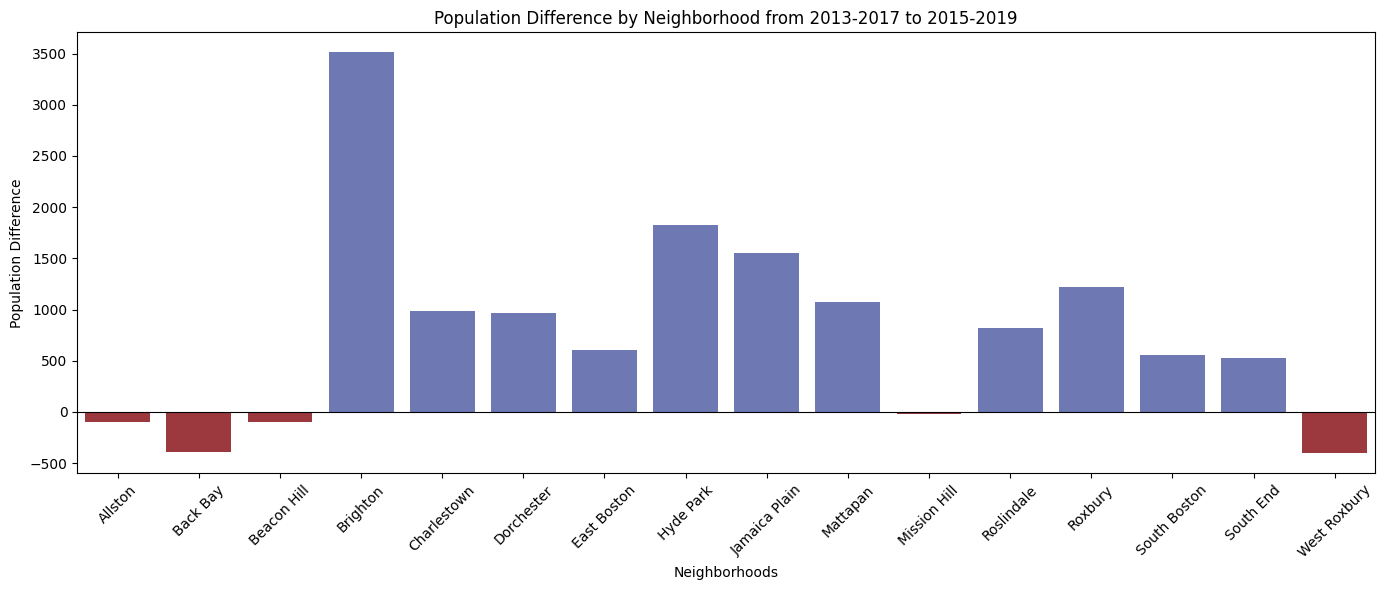

In [27]:
# Calculate the difference in population
pop_difference = data_2015_2019['pop 2015-2019'].values - data_2013_2017['pop 2013-2017'].values

# Prepare the data for plotting
pop_diff_df = pd.DataFrame({
    'Neighborhoods': data_2013_2017['Neighborhoods'],
    'Population Difference': pop_difference
})

# Plotting the population difference
plt.figure(figsize=(14, 6))
sns.barplot(x='Neighborhoods', y='Population Difference', data=pop_diff_df, palette=["#ad2831" if x < 0 else "#6270bf" for x in pop_diff_df['Population Difference']])
plt.title('Population Difference by Neighborhood from 2013-2017 to 2015-2019')
plt.ylabel('Population Difference')
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=0.8)  # Adds a line at zero for reference
plt.tight_layout()
plt.show()